In [4]:
import time
import numpy as np
import matplotlib.pyplot as plt
from pca import PCA
from knn import KNNClassifier
from utils import MNISTUtils, ModelUtils

### =================================

### Load MNIST dataset

### =================================

In [5]:
# Load Data from mnist dataset
X_train = MNISTUtils.read_mnist_images('data/train-images-idx3-ubyte')
y_train = MNISTUtils.read_mnist_labels('data/train-labels-idx1-ubyte')

X_test = MNISTUtils.read_mnist_images('data/t10k-images-idx3-ubyte')
y_test = MNISTUtils.read_mnist_labels('data/t10k-labels-idx1-ubyte')

print(f"Training images shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test images shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Training images shape: (60000, 784)
Training labels shape: (60000,)
Test images shape: (10000, 784)
Test labels shape: (10000,)


### =================================

### PCA Implementation 

### =================================

In [6]:
# method to implement PCA on dataset
def applyPCA(X_train, y_train, X_test, y_test, n_components=150):
    try:
        # Apply PCA
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
    
        print(f"Original shape: {X_train.shape}")
        print(f"Reduced shape: {X_train_pca.shape}")
    
        # Visualize explained variance ratio
        explained_variance_ratio = pca.explained_variance_ratio()
        cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
        
        plt.figure(figsize=(10, 5))
        plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
        plt.xlabel('Number of Components')
        plt.ylabel('Cumulative Explained Variance Ratio')
        plt.title(f'Explained Variance Ratio vs. Number of Components (n={n_components})')
        plt.grid(True)
        plt.show()
    
        # Visualize some reconstructed images
        n_img = 5
        original_img = X_test[:n_img]
        reconstructed_img = pca.inverse_transform(X_test_pca[:n_img])
        
        fig, axes = plt.subplots(2, n_img, figsize=(n_img * 2, 4))
        for i in range(n_img):
            axes[0, i].imshow(original_img[i].reshape(28, 28), cmap='gray')
            axes[0, i].axis('off')
            axes[0, i].set_title('Original')
        
            # reconstructed_real = np.real(reconstructed_img[i]).reshape(28, 28)
            axes[1, i].imshow(np.real(reconstructed_img[i].reshape(28, 28)), cmap='gray')
            axes[1, i].axis('off')
            axes[1, i].set_title('Reconstructed')
        
        plt.tight_layout()
        plt.show()
        
        print("PCA analysis complete!")
        print(f"\n==============================================================================\n")
    
        return X_train_pca, X_test_pca, pca
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

Original shape: (60000, 784)
Reduced shape: (60000, 10)


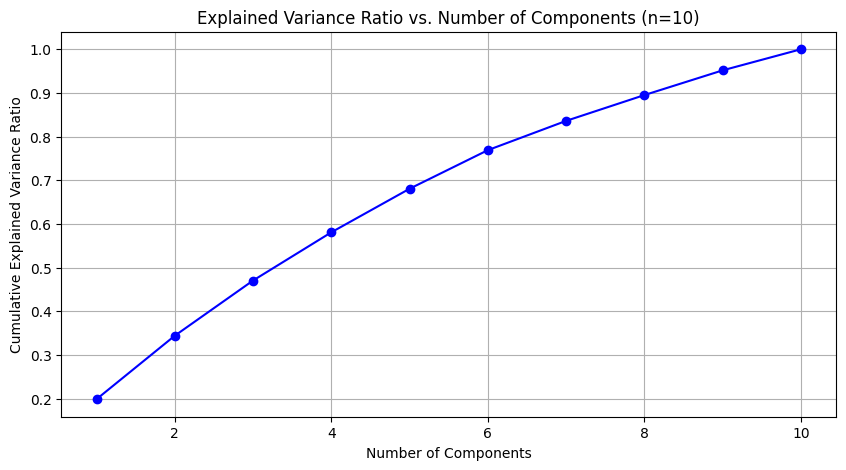

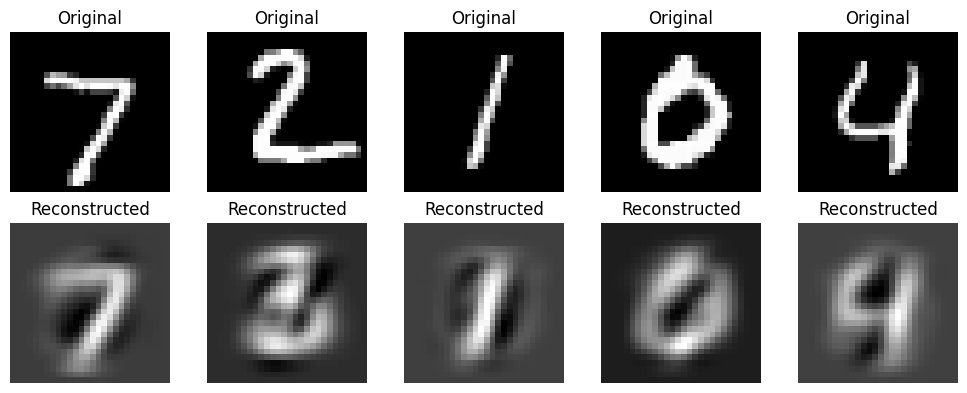

PCA analysis complete!


Original shape: (60000, 784)
Reduced shape: (60000, 200)


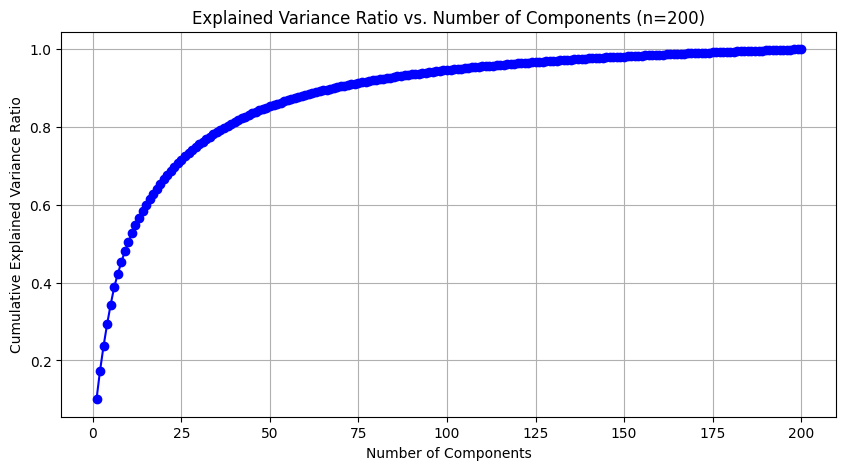

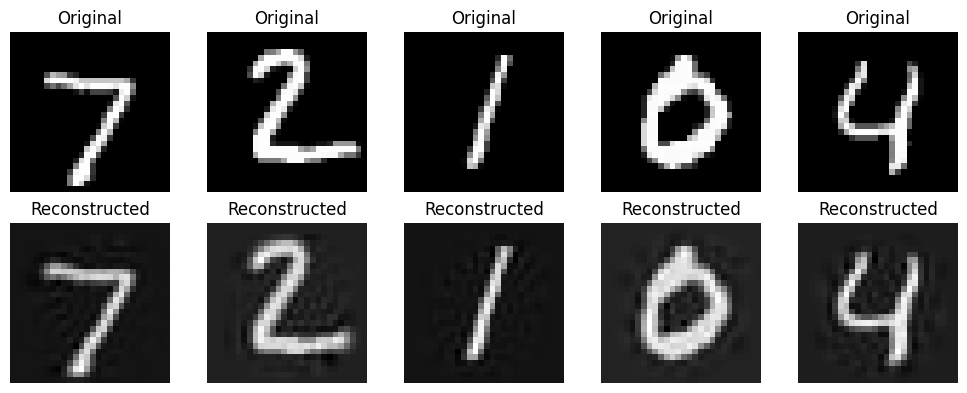

PCA analysis complete!


Original shape: (60000, 784)
Reduced shape: (60000, 500)


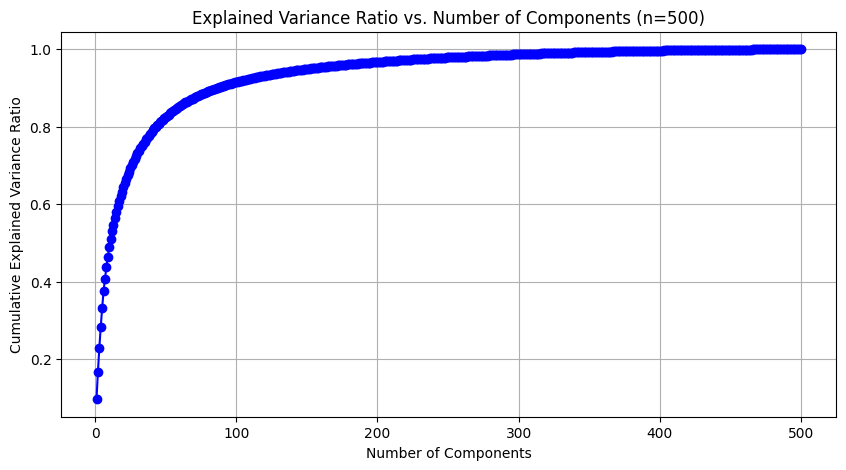

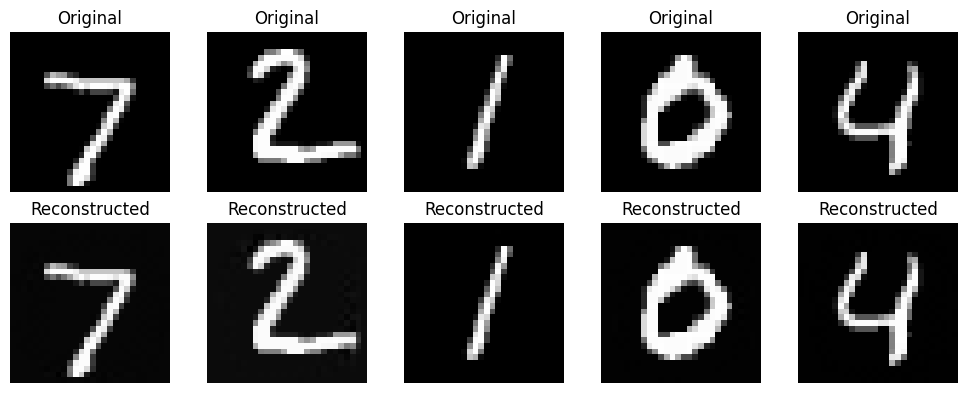

PCA analysis complete!




In [7]:
# Implement PCA with n_components 10, 200, and 500
X_train_10, X_test_10, pca_10 = applyPCA(X_train, y_train, X_test, y_test, n_components=10)
# X_train_50, X_test_50, pca_50 = applyPCA(X_train, y_train, X_test, y_test, n_components=50)
X_train_200, X_test_200, pca_200 = applyPCA(X_train, y_train, X_test, y_test, n_components=200)
# X_train_350, X_test_350, pca_350 = applyPCA(X_train, y_train, X_test, y_test, n_components=350)
X_train_500, X_test_500, pca_500 = applyPCA(X_train, y_train, X_test, y_test, n_components=500)

### =================================
### Apply KNN of PCA dataset
### =================================

In [13]:
def applyKNN(X_train, y_train, X_test, y_test, pca, n_neighbors=5, metric="euclidean", X_test_original=X_test):
    # Apply KNN
    knn = KNNClassifier(n_neighbors=n_neighbors, metric=metric)
    start_time = time.time()
    knn.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Make predictions
    print(f"Making predictions (k= {n_neighbors} metric={metric})... ")
    start_time = time.time()
    y_pred = knn.predict(X_test)
    predict_time = time.time() - start_time
    print("Predictions done...")

    # Calculate accuracy
    accuracy = ModelUtils.accuracy_score(y_test, y_pred)
    print(f"Training time: {train_time:.2f} seconds")
    print(f"Prediction time: {predict_time:.2f} seconds")
    print(f"Accuracy: {accuracy:.4f}")
    print(ModelUtils.classification_report(y_test, y_pred))

    visualize_pca_reconstructions(X_test_original, y_test, y_pred, pca)
    
    # Visualize some predictions
    fig, axes = plt.subplots(2, 5, figsize=(12, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(X_test_original[i].reshape(28, 28), cmap='gray')
        ax.set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

    print(f"\n===============================================================\n")


def visualize_pca_reconstructions(X_test, y_test, y_pred, pca, n_samples=10, figsize=(20, 4)):
    n_samples = min(n_samples, len(X_test))
    fig, axes = plt.subplots(3, n_samples, figsize=figsize)
    
    for i in range(n_samples):
        original_img = X_test[i].reshape(28, 28)
        reconstructed_img = pca.inverse_transform(pca.transform([X_test[i]])).reshape(28, 28)
        
        # Original image
        axes[0, i].imshow(original_img, cmap='gray')
        axes[0, i].set_title(f"Original")
        axes[0, i].axis('off')
        
        # Reconstructed image
        axes[1, i].imshow(reconstructed_img, cmap='gray')
        axes[1, i].set_title(f"Reconstructed")
        axes[1, i].axis('off')
        
        # Difference image
        diff_img = original_img - reconstructed_img
        axes[2, i].imshow(diff_img, cmap='coolwarm', vmin=-1, vmax=1)
        axes[2, i].set_title(f"Difference")
        axes[2, i].axis('off')
        
        # Add text annotation for true and predicted labels
        axes[0, i].text(0, -2, f"True: {y_test[i]}", ha='left', va='top')
        axes[0, i].text(27, -2, f"Pred: {y_pred[i]}", ha='right', va='top')
        
    plt.suptitle("PCA Image Reconstruction Visualization", fontsize=16)
    plt.tight_layout()
    plt.show()


In [14]:
# split data train and test data
# imitate the sklearn train_test_split method
n_train_data = 10000
n_test_data = 1000
n_random_state = 32

Xk_train_10, Xk_val_10, yk_train_10, yk_val_10 = ModelUtils.train_test_split(X_train_10, y_train, train_size=n_train_data/len(X_train_10), random_state=n_random_state)
Xk_test_10, yk_test_10 = X_test_10[:n_test_data], y_test[:n_test_data]

Xk_train_200, Xk_val_200, yk_train_200, yk_val_200 = ModelUtils.train_test_split(X_train_200, y_train, train_size=n_train_data/len(X_train_200), random_state=n_random_state)
Xk_test_200, yk_test_200 = X_test_200[:n_test_data], y_test[:n_test_data]

Xk_train_500, Xk_val_500, yk_train_500, yk_val_500 = ModelUtils.train_test_split(X_train_500, y_train, train_size=n_train_data/len(X_train_500), random_state=n_random_state)
Xk_test_500, yk_test_500 = X_test_500[:n_test_data], y_test[:n_test_data]

Making predictions (k= 5 metric=euclidean)... 
Predictions done...
Training time: 0.00 seconds
Prediction time: 25.32 seconds
Accuracy: 0.8920
Class 0:
  Precision: 0.9121
  Recall: 0.9765
  F1-score: 0.9432

Class 1:
  Precision: 0.9615
  Recall: 0.9921
  F1-score: 0.9766

Class 2:
  Precision: 0.9381
  Recall: 0.9138
  F1-score: 0.9258

Class 3:
  Precision: 0.9278
  Recall: 0.8411
  F1-score: 0.8824

Class 4:
  Precision: 0.9200
  Recall: 0.8364
  F1-score: 0.8762

Class 5:
  Precision: 0.9136
  Recall: 0.8506
  F1-score: 0.8810

Class 6:
  Precision: 0.9294
  Recall: 0.9080
  F1-score: 0.9186

Class 7:
  Precision: 0.8788
  Recall: 0.8788
  F1-score: 0.8788

Class 8:
  Precision: 0.8043
  Recall: 0.8315
  F1-score: 0.8177

Class 9:
  Precision: 0.7321
  Recall: 0.8723
  F1-score: 0.7961




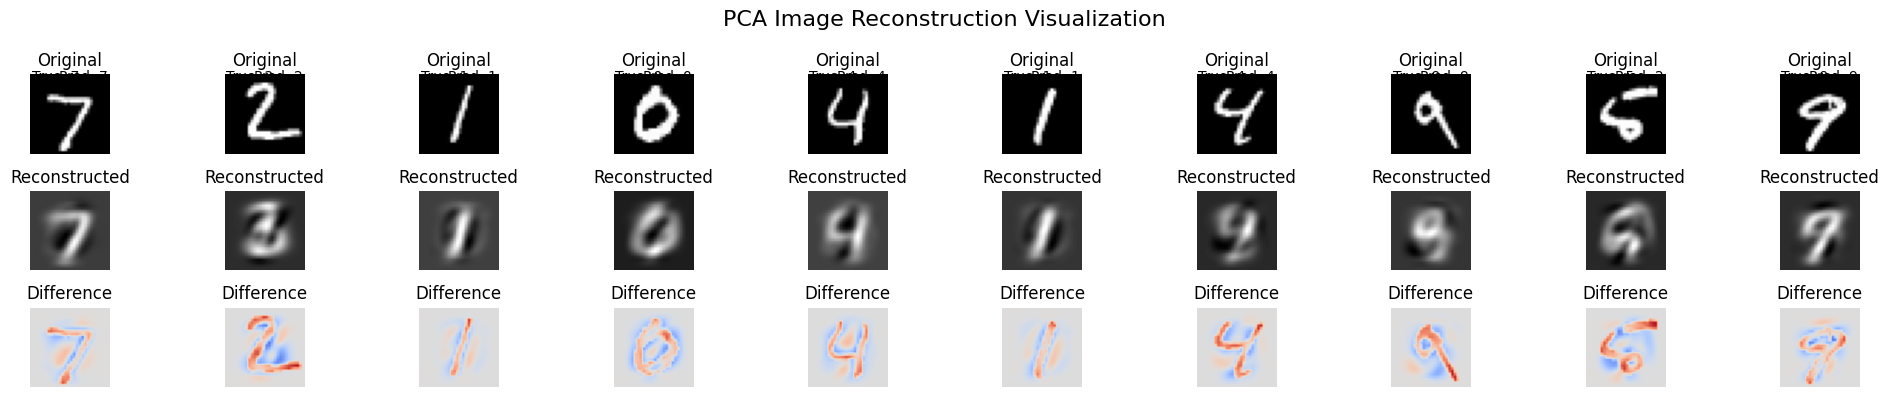

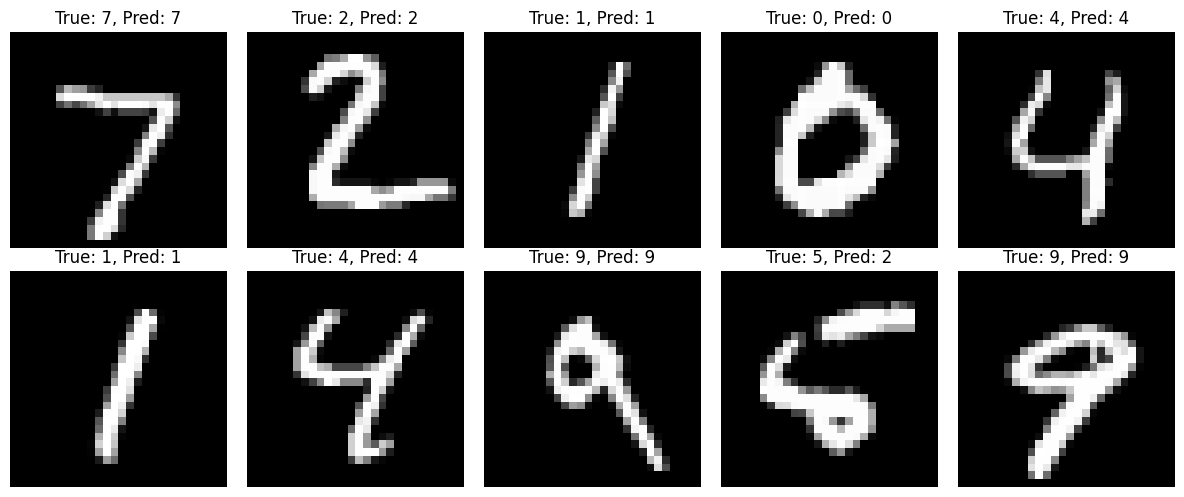



Making predictions (k= 5 metric=euclidean)... 
Predictions done...
Training time: 0.00 seconds
Prediction time: 28.20 seconds
Accuracy: 0.9350
Class 0:
  Precision: 0.9239
  Recall: 1.0000
  F1-score: 0.9605

Class 1:
  Precision: 0.9333
  Recall: 1.0000
  F1-score: 0.9655

Class 2:
  Precision: 0.9903
  Recall: 0.8793
  F1-score: 0.9315

Class 3:
  Precision: 0.9524
  Recall: 0.9346
  F1-score: 0.9434

Class 4:
  Precision: 0.9417
  Recall: 0.8818
  F1-score: 0.9108

Class 5:
  Precision: 0.9540
  Recall: 0.9540
  F1-score: 0.9540

Class 6:
  Precision: 0.9651
  Recall: 0.9540
  F1-score: 0.9595

Class 7:
  Precision: 0.8785
  Recall: 0.9495
  F1-score: 0.9126

Class 8:
  Precision: 0.9625
  Recall: 0.8652
  F1-score: 0.9112

Class 9:
  Precision: 0.8627
  Recall: 0.9362
  F1-score: 0.8980




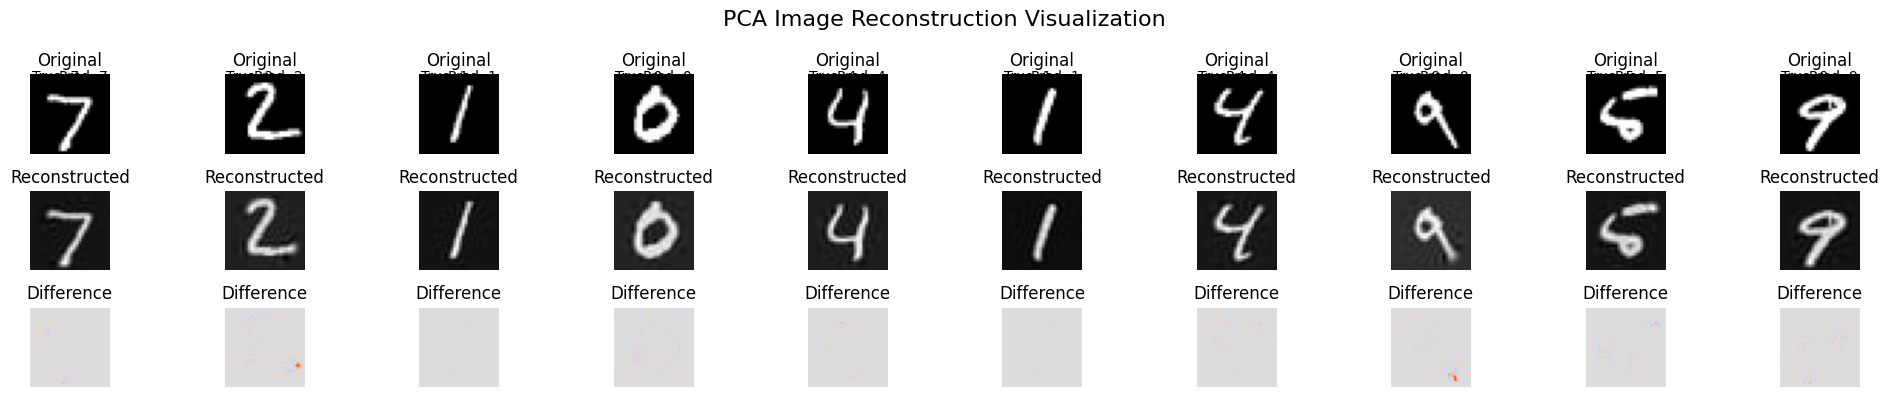

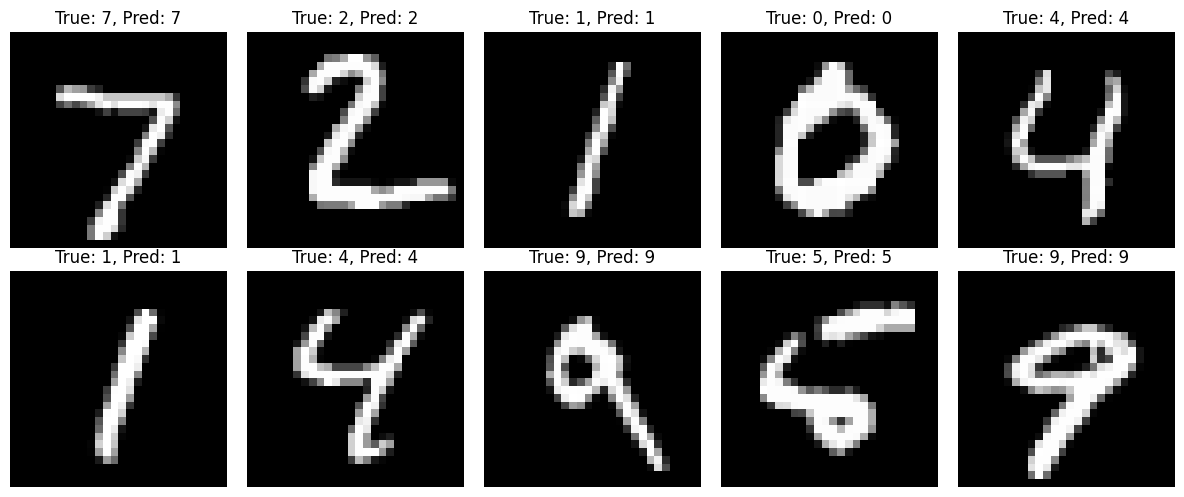



Making predictions (k= 5 metric=euclidean)... 
Predictions done...
Training time: 0.00 seconds
Prediction time: 30.08 seconds
Accuracy: 0.9230
Class 0:
  Precision: 0.9239
  Recall: 1.0000
  F1-score: 0.9605

Class 1:
  Precision: 0.9130
  Recall: 1.0000
  F1-score: 0.9545

Class 2:
  Precision: 0.9806
  Recall: 0.8707
  F1-score: 0.9224

Class 3:
  Precision: 0.9333
  Recall: 0.9159
  F1-score: 0.9245

Class 4:
  Precision: 0.9495
  Recall: 0.8545
  F1-score: 0.8995

Class 5:
  Precision: 0.9419
  Recall: 0.9310
  F1-score: 0.9364

Class 6:
  Precision: 0.9540
  Recall: 0.9540
  F1-score: 0.9540

Class 7:
  Precision: 0.8585
  Recall: 0.9192
  F1-score: 0.8878

Class 8:
  Precision: 0.9747
  Recall: 0.8652
  F1-score: 0.9167

Class 9:
  Precision: 0.8286
  Recall: 0.9255
  F1-score: 0.8744




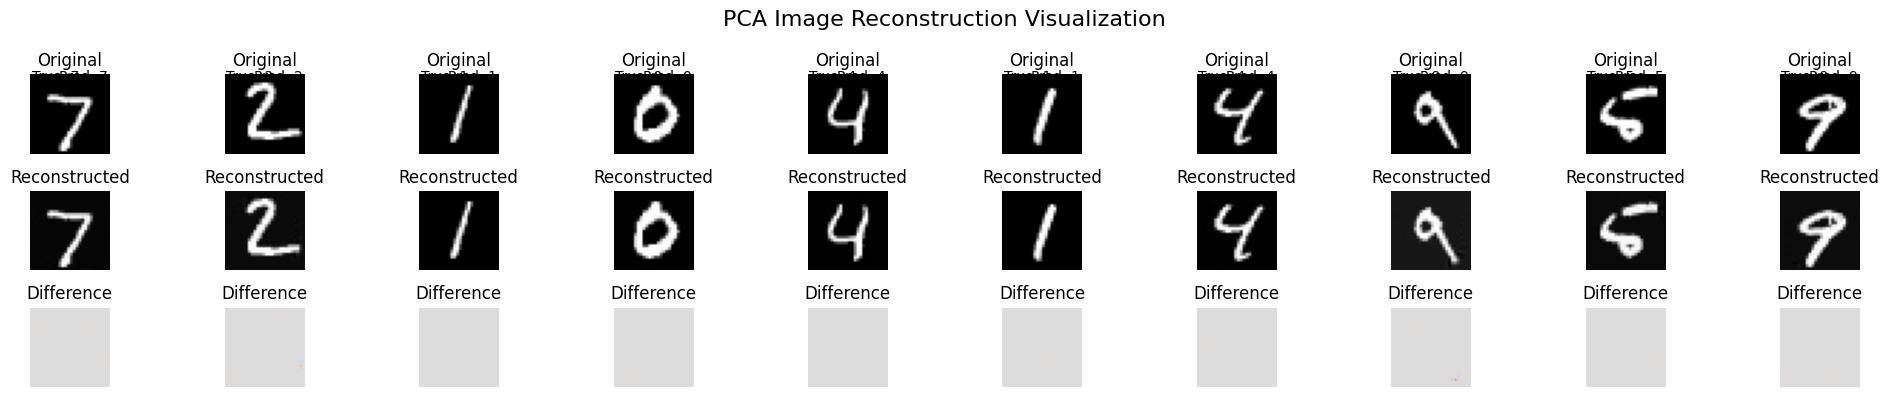

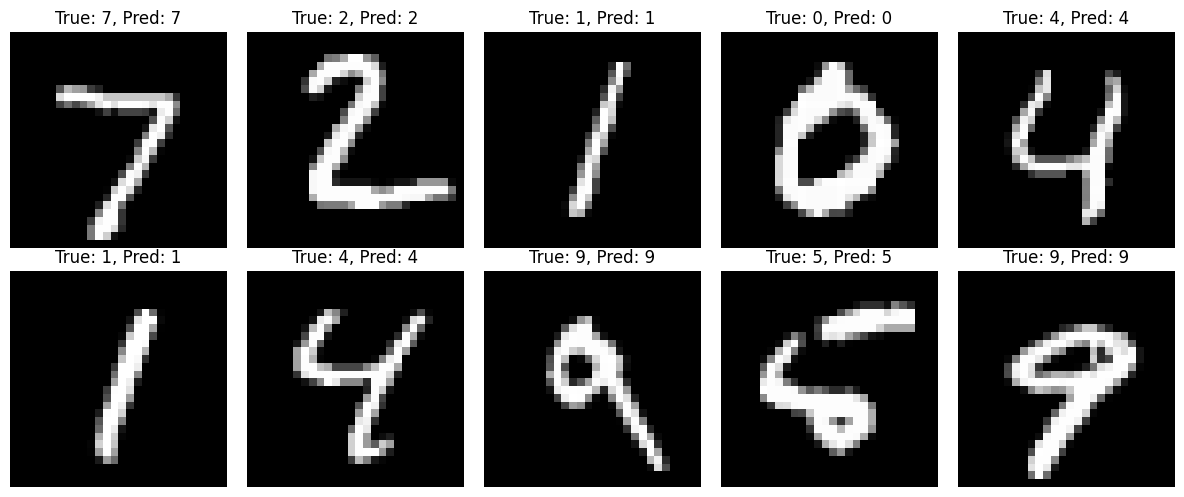

In [15]:
# implement knn with data from PCA
# default K neighbors value are 5
n_neighbors = 5
applyKNN(Xk_train_10, yk_train_10, Xk_test_10, yk_test_10, pca_10, n_neighbors)
applyKNN(Xk_train_200, yk_train_200, Xk_test_200, yk_test_200, pca_200, n_neighbors)
applyKNN(Xk_train_500, yk_train_500, Xk_test_500, yk_test_500, pca_500, n_neighbors)